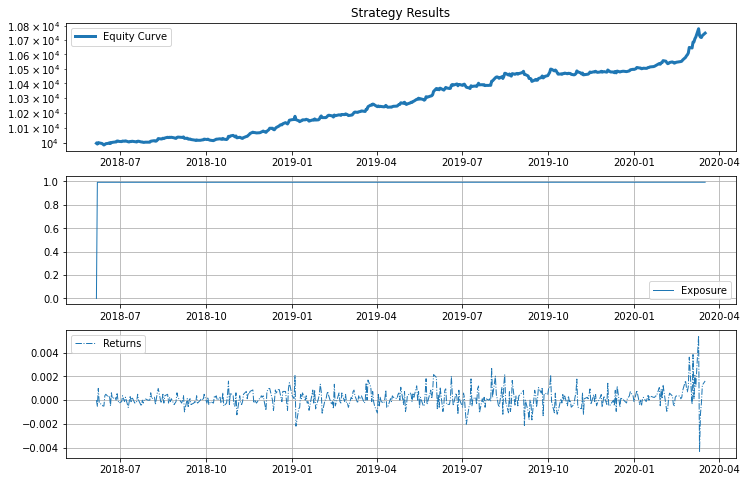

In [1]:
# This ensures that our graphs will be shown properly in the notebook.
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import Zipline functions that we need
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol

# Import date and time zone libraries
from datetime import datetime
import pytz

# Import visualization
import matplotlib.pyplot as plt
import pandas as pd

def initialize(context):
    # Which stock to trade
    context.stock = symbol('SHY')
    
    # Moving average window
    context.index_average_window = 100
    
def handle_data(context, data):
    # Request history for the stock
    equities_hist = data.history(context.stock, "close", 
                                 context.index_average_window, "1d")
    
    # Check if price is above moving average
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0
    
    # Place order
    order_target_percent(context.stock, stock_weight)

def analyze(context, perf):
    fig = plt.figure(figsize=(12, 8))
    
    # First chart
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.semilogy(perf['portfolio_value'], linestyle='-', 
                label='Equity Curve', linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    # Second chart
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'], 
            label='Exposure', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)

    # Third chart
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], label='Returns', linestyle='-.', linewidth=1.0)
    ax.legend()
    ax.grid(True)

# Set start and end date
start_date = pd.Timestamp('2018-06-05',tz ='utc')
end_date = pd.Timestamp('2020-3-16',tz ='utc')

#start_date = datetime(2016, 1, 3, tzinfo=pytz.UTC)
# end_date = datetime(2018, 12, 31, tzinfo=pytz.UTC)
# end_date = datetime(2018, 1, 31, tzinfo=pytz.UTC)

# Fire off the backtest
results = run_algorithm(
    start=start_date, 
    end=end_date, 
    initialize=initialize, 
    analyze=analyze, 
    handle_data=handle_data, 
    capital_base=10000, 
    data_frequency = 'daily', 
    bundle='csv_data_daily' 
) 


In [ ]:
import pandas as pd

start_date = datetime(2018, 6, 5, tzinfo=pytz.UTC)

type(start_date) == datetime #pd.Timestamp